In [4]:
import rasterio
import numpy as np

def layer_stack_and_export(raster_paths, output_path):
    # Read the first raster to get metadata and dimensions
    with rasterio.open(raster_paths[0]) as src0:
        meta = src0.meta
        meta.update(count=len(raster_paths))  # Update metadata to reflect the number of bands

    # Open the raster files and stack them
    layers = []
    for path in raster_paths:
        with rasterio.open(path) as src:
            layers.append(src.read(1))  # Read the first band (assuming single-band rasters)

    # Stack the layers along the third dimension (bands)
    stacked_array = np.stack(layers, axis=0)

    # Write the stacked raster to a new file
    with rasterio.open(output_path, 'w', **meta) as dst:
        for i in range(stacked_array.shape[0]):
            dst.write(stacked_array[i], i + 1)  # Write each band

# Example usage:
raster_paths = ['/home/jovyan/shared/PCN/ALOS-2/Filter_ALOS2/2007HVfiltered5_image.tif', '/home/jovyan/shared/PCN/ALOS-2/Filter_ALOS2/2010HVfiltered5_image.tif']  # Paths to your rasters
output_path = '/home/jovyan/shared/PCN/ALOS-2/Layerstack/07_10_HVstacked_output.tif'  # Output path for the stacked raster
layer_stack_and_export(raster_paths, output_path)


In [1]:
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
import numpy as np

# Paths to the individual raster files (each representing a different band)
raster_paths = ['/home/jovyan/shared/PCN/ALOS-2/LANDSAT/exported2007_rgb_landsat5.tiff', '/home/jovyan/shared/PCN/ALOS-2/LANDSAT/exported2010_rgb_landsat5.tif', '/home/jovyan/shared/PCN/ALOS-2/LANDSAT/exported2015_rgb_landsat8.tif', '/home/jovyan/shared/PCN/ALOS-2/LANDSAT/exported2020_rgb_landsat8.tif']  # Add more paths as needed

# Open each raster file and read it as an array
bands = []
for path in raster_paths:
    with rasterio.open(path) as src:
        bands.append(src.read(1))  # Read the first band from each file

# Stack the individual bands into a multi-band array
stacked_array = np.stack(bands, axis=0)

# Get metadata from one of the raster files to use in the output
with rasterio.open(raster_paths[0]) as src:
    out_meta = src.meta.copy()

# Update the metadata to reflect the number of layers (bands)
out_meta.update({
    "count": len(raster_paths),  # Number of layers
    "dtype": stacked_array.dtype  # Update data type
})

# Output file path for the stacked raster
output_path = '/home/jovyan/shared/PCN/ALOS-2/Layerstack/07_20_Oilpalm_Landsat_output.tif'

# Write the stacked array to a new multi-band raster file
with rasterio.open(output_path, 'w', **out_meta) as dest:
    for i in range(stacked_array.shape[0]):
        dest.write(stacked_array[i], i + 1)  # Write each band (i+1 since bands are 1-indexed)

print(f'Stacked raster exported to {output_path}')


Stacked raster exported to /home/jovyan/shared/PCN/ALOS-2/Layerstack/07_20_Oilpalm_Landsat_output.tif


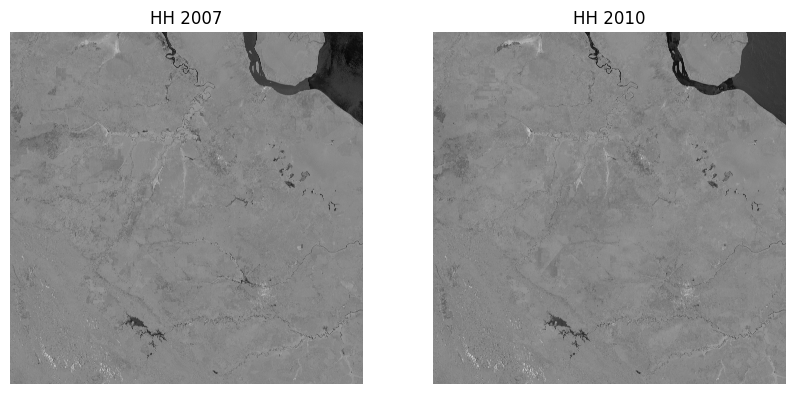

In [1]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

# Step 1: Load the first ALOS-2 HH image (e.g., from 2007)
image_path_2007 = '/home/jovyan/shared/PCN/ALOS-2/Filter_ALOS2/2007HHfiltered5_image.tif'
with rasterio.open(image_path_2007) as src_2007:
    hh_2007 = src_2007.read(1)  # Read the first band (HH polarization)
    profile_2007 = src_2007.profile  # Save metadata for later use

# Step 2: Load the second ALOS-2 HH image (e.g., from 2010)
image_path_2010 = '/home/jovyan/shared/PCN/ALOS-2/Filter_ALOS2/2010HHfiltered5_image.tif'
with rasterio.open(image_path_2010) as src_2010:
    hh_2010 = src_2010.read(1)  # Read the first band (HH polarization)
    profile_2010 = src_2010.profile

# Step 3: Ensure both images have the same shape and resolution
if hh_2007.shape != hh_2010.shape:
    raise ValueError("Images do not have the same shape or resolution")

# Step 4: Stack the two images along the band dimension
# np.stack creates a 3D array where each year is a band
stacked_image = np.stack([hh_2007, hh_2010], axis=0)

# Step 5: Update the metadata for the new multi-band image
profile_2007.update({
    'count': 2,  # Number of bands (2 in this case)
    'dtype': 'float32',  # Assuming the pixel type is float32
})

# Step 6: Export the stacked image as a new GeoTIFF
output_path = '/home/jovyan/shared/PCN/ALOS-2/Layerstack/07_10_HHstacked_output_new.tif'
with rasterio.open(output_path, 'w', **profile_2007) as dst:
    dst.write(stacked_image)

# Step 7: Optionally visualize the stacked image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(hh_2007, cmap='gray')
plt.title('HH 2007')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hh_2010, cmap='gray')
plt.title('HH 2010')
plt.axis('off')

plt.show()
